In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

In [3]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

In [4]:
#first few rows analysis
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [5]:
#checking for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


no missing values




In [7]:
#merging datasets on transactions
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x   CustomerName_x       Region_x SignupDate_x  \
0      300.68   300.68   Andrea Jenkins         Europe   2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia   2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe   2024-04-04   
3      601.36   300.68  Travis Campbell  South America   2024-04-11   
4      902.04   300.68    Timothy Perez         Europe   2022-03-15   

                     ProductName_x   Category_x  Price_y   CustomerName_y  \
0  ComfortLiving Bluetooth Speaker  Electronics   300.68   Andrea Jen

In [8]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Day'] = transactions['TransactionDate'].dt.day

EDA

<ipython-input-12-913ff3787ecd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region_x', y='TotalValue', data=sales_by_region, palette='viridis')


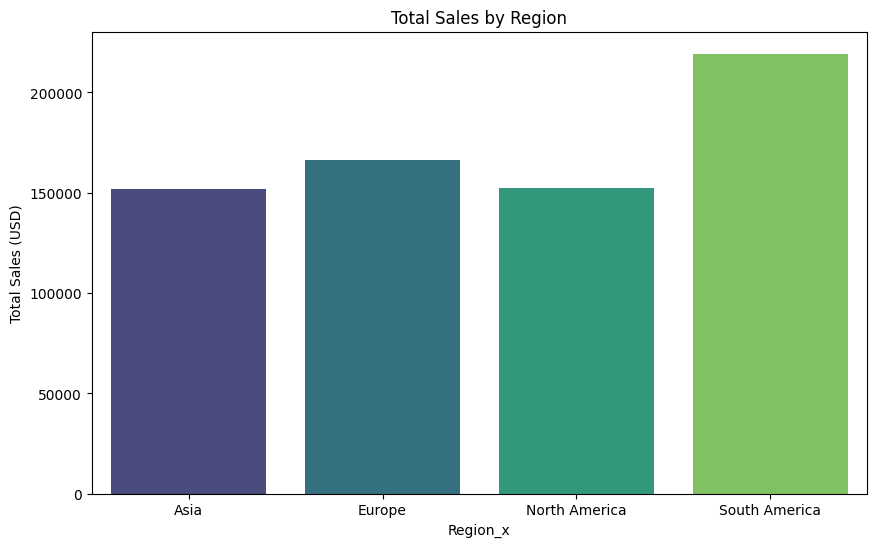

In [12]:
#1.sales by region
sales_by_region = transactions.groupby('Region_x')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region_x', y='TotalValue', data=sales_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region_x')
plt.ylabel('Total Sales (USD)')
plt.show()

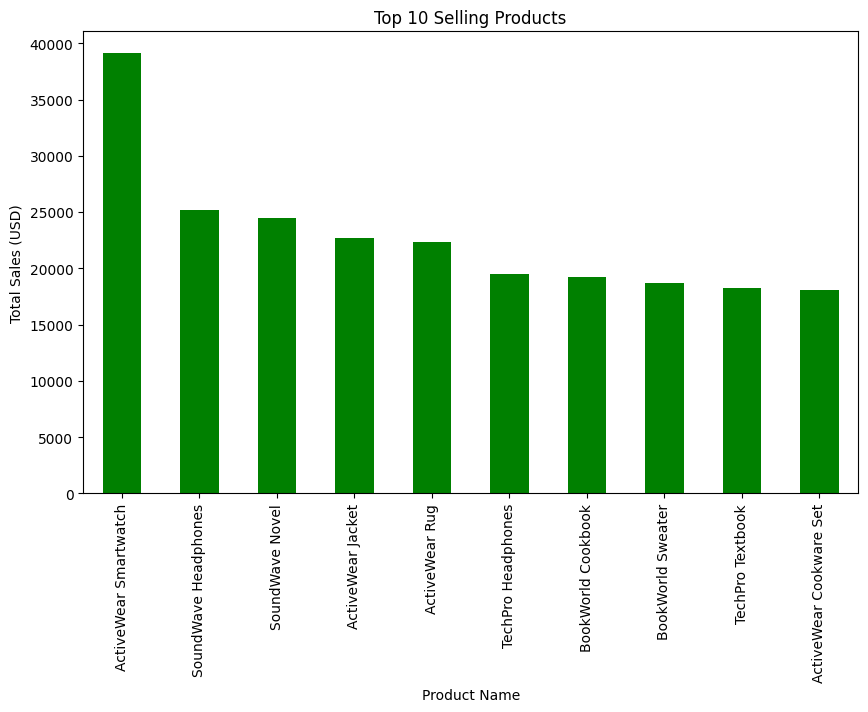

In [16]:
#2.most selling products
top_products = transactions.groupby('ProductName_x')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.show()

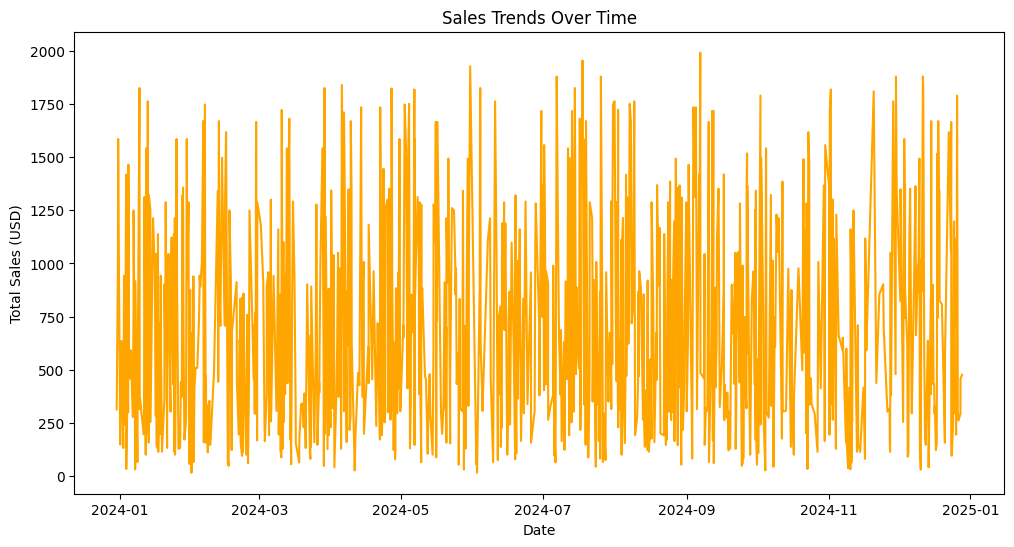

In [17]:
#3.sales trends over time
sales_trends = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TotalValue', data=sales_trends, color='orange')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()

<ipython-input-19-78cd9dd06ff1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category_x', y='TotalValue', data=sales_by_category, palette='coolwarm')


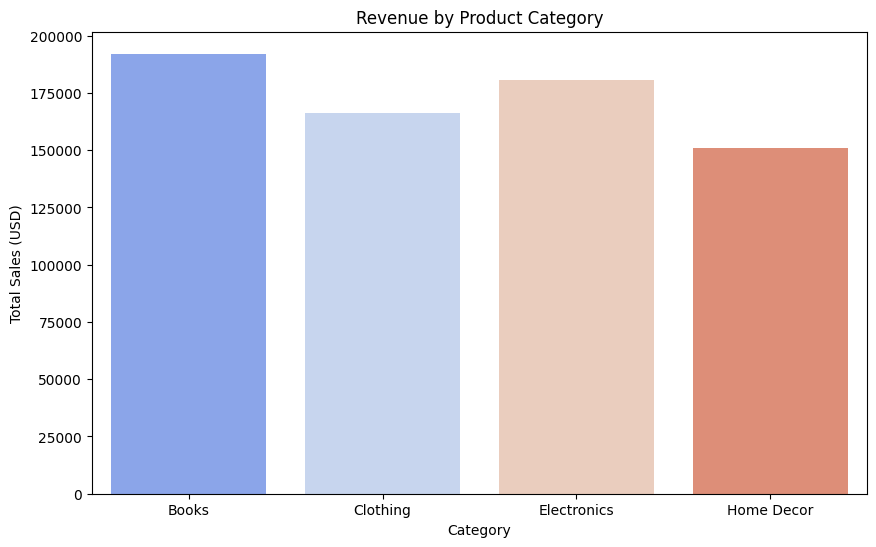

In [19]:
# 4. Revenue by product category
sales_by_category = transactions.groupby('Category_x')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category_x', y='TotalValue', data=sales_by_category, palette='coolwarm')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

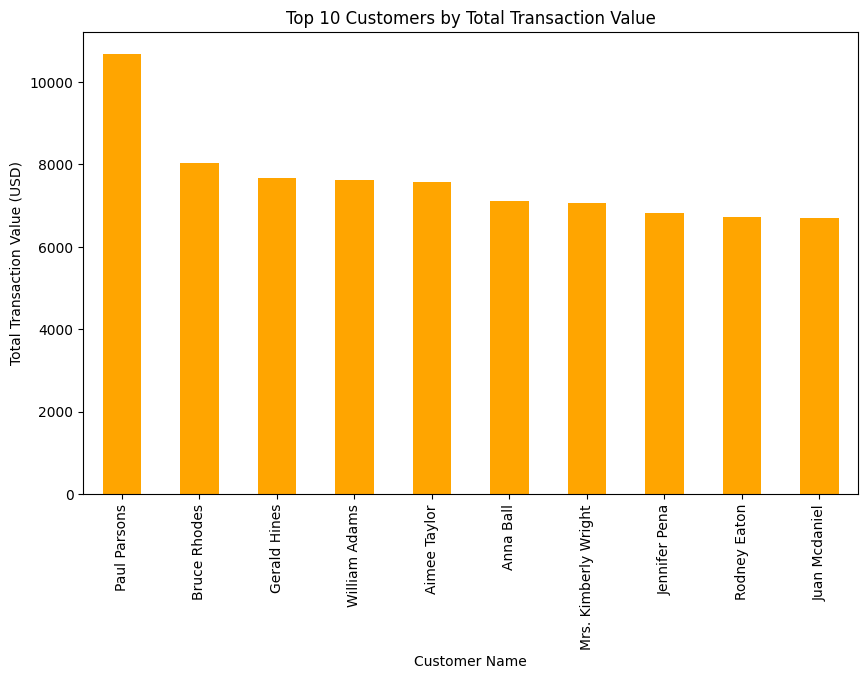

In [23]:
#5. Customer segmentation by transaction value
customer_segment = transactions.groupby('CustomerName_x')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
customer_segment.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Customer Name')
plt.ylabel('Total Transaction Value (USD)')
plt.show()